In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data=pd.read_csv("CreditRisk.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [11]:
data.drop("Loan_ID",1,inplace=True)

In [20]:
data["Credit_History"]=data["Credit_History"].astype("category")
data["Loan_Status"]=data["Loan_Status"].astype("category")

In [22]:
data.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,614.000000,600.00000,564.0,614,614.0
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,2.0,3,2.0
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,1.0,Semiurban,1.0
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,475.0,233,422.0
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,141.166124,342.00000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,88.340630,65.12041,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,0.000000,12.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,98.000000,360.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,125.000000,360.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.00000,NaN,NaN,NaN


In [23]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
data.dropna(axis=0,inplace=True)

In [28]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
data.shape

(499, 12)

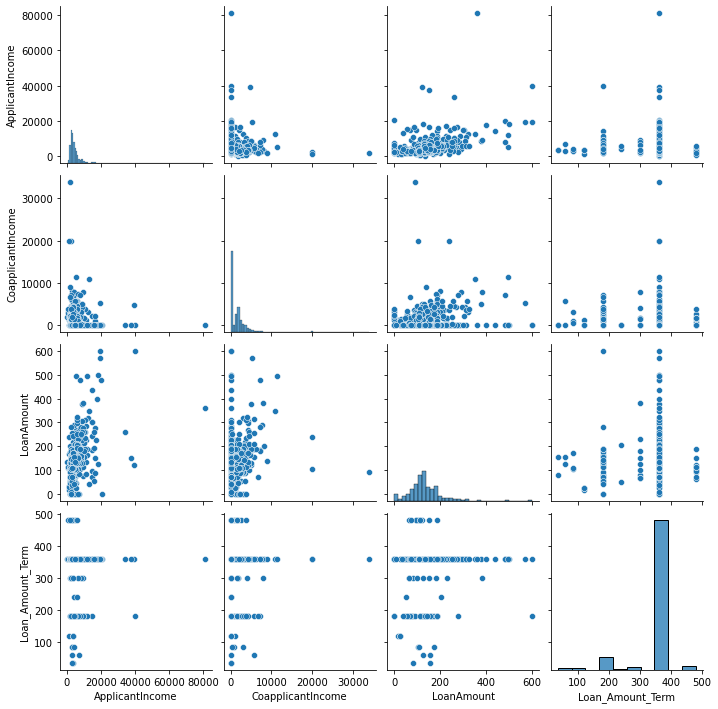

In [31]:
sns.pairplot(data)

In [33]:
data.corr().style.background_gradient()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.114489,0.470756,-0.007663
CoapplicantIncome,-0.114489,1.000000,0.188117,-0.008559
LoanAmount,0.470756,0.188117,1.000000,0.048301
Loan_Amount_Term,-0.007663,-0.008559,0.048301,1.000000


<AxesSubplot:>

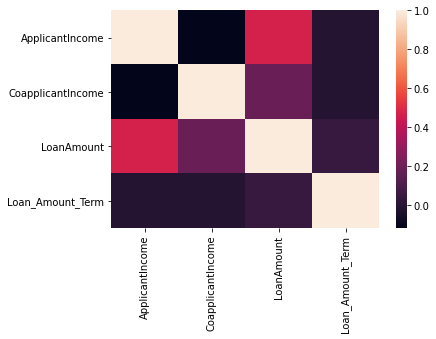

In [34]:
sns.heatmap(data.corr())

# Eliminate the Multicolinearity

In [35]:
import statsmodels.api as sm

In [38]:
x=data.drop("Loan_Status",axis=1)
y=data[["Loan_Status"]]

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [54]:
cols=["ApplicantIncome", 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

In [55]:
x[cols]=scaler.fit_transform(x[cols])

# Getting the dummies

In [58]:
x=pd.get_dummies(x, drop_first=True)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,random_state=1,test_size=0.3)

In [62]:
x_train.shape

(349, 14)

In [63]:
x_test.shape

(150, 14)

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [75]:
cm=metrics.confusion_matrix(y_test,ypred)
print(cm)

[[23 32]
 [ 1 94]]


In [84]:
confusion_matrix=pd.DataFrame(cm,columns=[i for i in ["pred 0","pred1"]],index=[i for i in ["0","1"]] )

<AxesSubplot:>

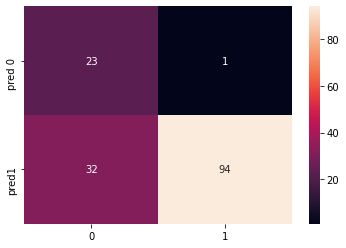

In [85]:
sns.heatmap(confusion_matrix.T,annot=True)

In [90]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix

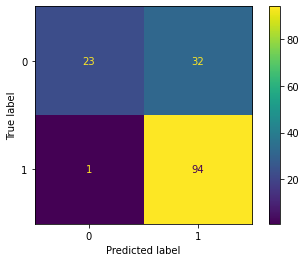

In [92]:
plot_confusion_matrix(logreg,x_test,y_test)

In [95]:
Y=logreg.fit(x_train,y_train).predict_proba(x_test)

In [101]:
from sklearn.metrics import roc_curve,auc,accuracy_score
FPR,TPR,THRES=roc_curve(y_test,Y[:,1])
print(auc(FPR,TPR))
print(accuracy_score(y_test,ypred))

0.7209569377990431
0.78


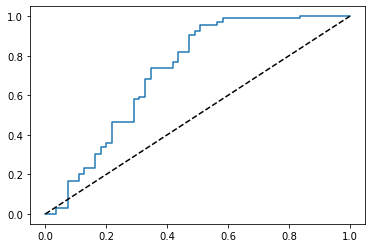

In [103]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],"k--")

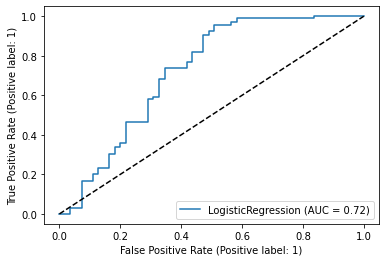

In [106]:
metrics,plot_roc_curve(logreg,x_test,y_test)
plt.plot([0,1],[0,1],"k--")

# Gmean

In [108]:
Gmean=np.sqrt(TPR*(1-FPR))
Gmean

array([0.        , 0.        , 0.        , 0.17444375, 0.17112071,
       0.39518635, 0.3873601 , 0.42211588, 0.41778637, 0.44956119,
       0.44009568, 0.50528309, 0.49976071, 0.52497437, 0.51910855,
       0.53508484, 0.52896939, 0.60175183, 0.57308032, 0.64072328,
       0.63245553, 0.63817923, 0.62972615, 0.6784446 , 0.66921364,
       0.69447581, 0.65475807, 0.66864141, 0.65811097, 0.68027577,
       0.65796555, 0.69088391, 0.67886762, 0.68671606, 0.67434178,
       0.68573992, 0.64652179, 0.65006441, 0.63637731, 0.64325726,
       0.40238523, 0.40451992, 0.        ])

In [111]:
ix=np.argmax(Gmean)
ix

25

Brest Threshold:  0.790140950734104


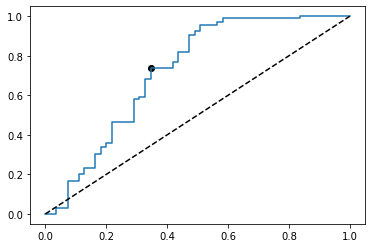

In [116]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],"k--")
plt.scatter(FPR[ix],TPR[ix],color="black")
print("Brest Threshold: ",THRES[ix])

# Pression recall curve

In [120]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_test,Y[:,1])

In [141]:
fscore = (2 * precision * recall) / (precision + recall)

In [143]:
ix=np.argmax(fscore)


139

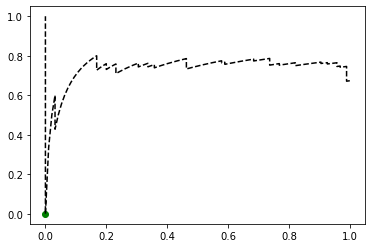

In [139]:
plt.plot(recall,precision,"k--")
plt.scatter(recall[ix],precision[ix],color="green")

In [145]:
print(threshold[ix],fscore[ix])

0.9703441580457596 nan


In [152]:
from sklearn.metrics import roc_auc_score,r2_score

In [148]:
roc_auc_score(y_test,Y[:,1])

0.7209569377990431

In [149]:
print(logreg.score(x_train,y_train))

0.8223495702005731


In [151]:
print(logreg.score(x_test,y_test))

0.78


In [153]:
print(r2_score(y_test,ypred))

0.052631578947368474
